In [1]:
# Import packages

# Ensure that this code works on both python 2 and python 3
from __future__ import division, print_function, absolute_import, unicode_literals

# basic numeric computation:
import numpy as np

# The package used for creating and manipulating HDF5 files:
import h5py

# Plotting and visualization:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mpltick

# for downloading files:
import wget
import os

# multivariate analysis:
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
import subprocess
import sys

def install(package):
    subprocess.call([sys.executable, "-m", "pip", "install", package])
# Package for downloading online files:
# finally import pycroscopy:
try:
    import pyUSID as usid
except ImportError:
    print('pyUSID not found.  Will install with pip.')
    import pip
    install('pyUSID')
    import pyUSID as usid
try:
    import pycroscopy as px
except ImportError:
    print('pycroscopy not found.  Will install with pip.')
    import pip
    install('pycroscopy')
    import pycroscopy as px
from pycroscopy.viz import cluster_utils

def single_image_plot(image, title, xvec, cmap=plt.cm.afmhot, zrange=None, axis=None, fig=None, posn=None, **kwargs):
    if axis is None:
        fig, axis = plt.subplots()   
        #gs = gridspec.GridSpec(1)

    #xvec = np.linspace( 0, usid.hdf_utils.get_attributes(experiment[i]['Measurement_000'])['ScanSize']/10**(-6), len(image[0]))
    
    if zrange is None:
        
        handle, cbar = usid.plot_utils.plot_map(axis, image, cmap=cmap, x_vec = xvec, y_vec=xvec, **kwargs)
        #axis.set_title(title)    
        axis.set_xlabel('X ($\\mathrm{\\mu}$m)')
        axis.set_ylabel('Y ($\\mathrm{\\mu}$m)')
    else:
        
        handle, cbar = usid.plot_utils.plot_map(axis, image, cmap=cmap, vmin=zrange[0], vmax=zrange[1], x_vec = xvec, y_vec=xvec, **kwargs)
        #axis.set_title(title)        
        axis.set_xlabel('X ($\\mathrm{\\mu}$m)')
        axis.set_ylabel('Y ($\\mathrm{\\mu}$m)')

    return fig, axis, cbar

def get_2DFFT( image, axis=None ):
    '''
    Calculates the 2D fourier transform of a bitmap image 
    '''
    image_raw = image.get_n_dim_form().squeeze()

    fft_image = np.fft.fft2(image_raw)

    fft_image = np.fft.fftshift(fft_image)
    
    return fft_image



In [2]:
from tkinter import filedialog

diry = filedialog.askdirectory()

In [3]:
def convert_to_h5( directory ):
    c = 1
    for file in os.listdir( diry ):
        if file.endswith(".ibw"):
            tmp = trans.translate( os.path.join(diry, file) )
            h5_file = h5py.File( tmp, mode='r' ) 
            print(os.path.join( diry, file ) + " - " + str(c))
            #experiment.append( h5_file )
            h5_file.close()
            c = c + 1
    print('Completed')
    return
trans = px.io.translators.igor_ibw.IgorIBWTranslator()
convert_to_h5( diry )

C:\Users\oliver\anaconda3\lib\site-packages\pyUSID\io\hdf_utils\simple.py:1081: UserWarning: In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying
  warn('In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying')
C:\Users\oliver\anaconda3\lib\site-packages\pyUSID\io\usi_data.py:151: UserWarning: This dataset does not have an N-dimensional form
  warn('This dataset does not have an N-dimensional form')


(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
C:/Users/oliver/OneDrive - UNSW/Experiments 2018/Raw AFM data/181127\Image0000.ibw - 1
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
C:/Users/oliver/OneDrive - UNSW/Experiments 2018/Raw AFM data/181127\N0060aOP0000.ibw - 2
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
(65536, 1)
C:/Users/oliver/OneDrive - UNSW

In [3]:
#diry = r"C:\Users\oliver\OneDrive - UNSW\Samples_Ralph_Dan\Daniel_2018\DS18002_BFO-LAO_310_5k\PFM\\"


catalogue = []
datfiles = []
for file in os.listdir(diry):
    if file.endswith('h5'):
        data = h5py.File(os.path.join( diry, file) )
        datfiles.append(data)
        catalogue.append(usid.hdf_utils.get_all_main(data))
        print('file')



#path, dirs, files = next(os.walk("/usr/lib"))
#fname = 'X0deg_inplane0000.h5'
#h5_file = h5py.File( diry + fname , mode='r' ) 

C:\Users\oliver\anaconda3\lib\site-packages\ipykernel_launcher.py:8: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  
C:\Users\oliver\anaconda3\lib\site-packages\pyUSID\io\usi_data.py:151: UserWarning: This dataset does not have an N-dimensional form
  warn('This dataset does not have an N-dimensional form')


file
file
file
file
file
file
file
file
file
file
file
file
file
file
file
file


In [4]:
i=0
for scan in catalogue:
    print( str(scan[0].file.filename) + ' - ' + str(i) )
    i += 1

C:/Users/oliver/OneDrive - UNSW/Experiments 2020/Asylum/200912\OP18N0010000.h5 - 0
C:/Users/oliver/OneDrive - UNSW/Experiments 2020/Asylum/200912\OP18N0010001.h5 - 1
C:/Users/oliver/OneDrive - UNSW/Experiments 2020/Asylum/200912\OP18N0010002.h5 - 2
C:/Users/oliver/OneDrive - UNSW/Experiments 2020/Asylum/200912\OP18N001_10um0000.h5 - 3
C:/Users/oliver/OneDrive - UNSW/Experiments 2020/Asylum/200912\OP18N001_2um0000.h5 - 4
C:/Users/oliver/OneDrive - UNSW/Experiments 2020/Asylum/200912\OP18N001_2um0001.h5 - 5
C:/Users/oliver/OneDrive - UNSW/Experiments 2020/Asylum/200912\OP18N001_2um0002.h5 - 6
C:/Users/oliver/OneDrive - UNSW/Experiments 2020/Asylum/200912\P0096SA0000.h5 - 7
C:/Users/oliver/OneDrive - UNSW/Experiments 2020/Asylum/200912\P0096SA_2_5um0000.h5 - 8
C:/Users/oliver/OneDrive - UNSW/Experiments 2020/Asylum/200912\P0096SA_2_5um0001.h5 - 9
C:/Users/oliver/OneDrive - UNSW/Experiments 2020/Asylum/200912\P0096SA_2_5um0002.h5 - 10
C:/Users/oliver/OneDrive - UNSW/Experiments 2020/Asylum

In [89]:
%qtconsole

In [ ]:
catalogue[2][0].visualize

##### 

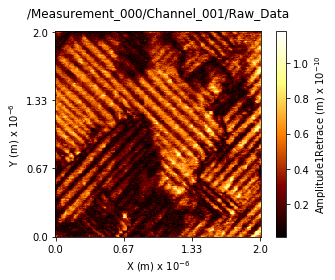

In [5]:
fig, ax = catalogue[3][1].visualize(cmap=plt.cm.afmhot )

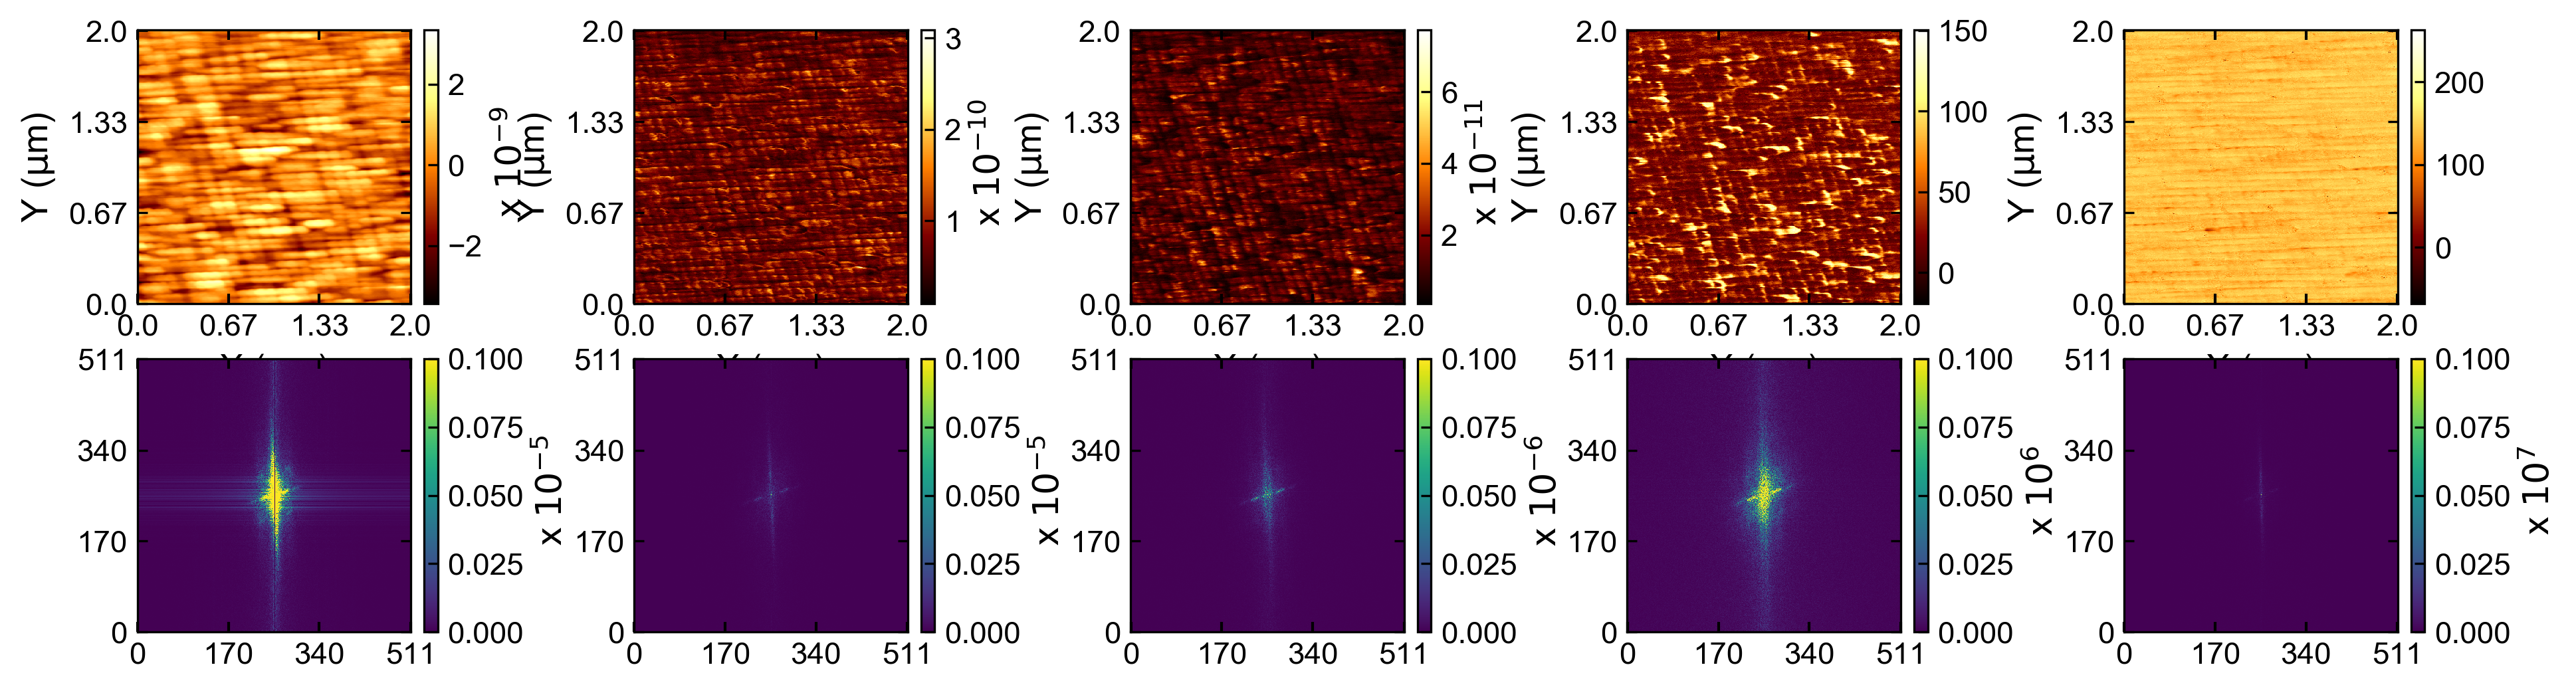

In [28]:
fig, ax = plt.subplots(2,5, figsize=(15,4))
#figft, axft = plt.subplots(1,5, figsize=(15,4))
i=0
j=10
for scan in catalogue[j][:-1]:
    xvec = np.linspace( 0, usid.hdf_utils.get_attributes(datfiles[j]['Measurement_000'])['ScanSize']/10**(-6), 
                       len(catalogue[j][0].get_n_dim_form().squeeze()))
    fig, ax[0,i], cbar = single_image_plot(scan.get_n_dim_form().squeeze(), 'title', xvec, axis=ax[0,i])
    fft_scan = get_2DFFT(scan)
    ax[1][i] = usid.plot_utils.plot_map(ax[1,i], np.abs(fft_scan), clim=[0, 0.1])
    i += 1






C:\Users\oliver\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


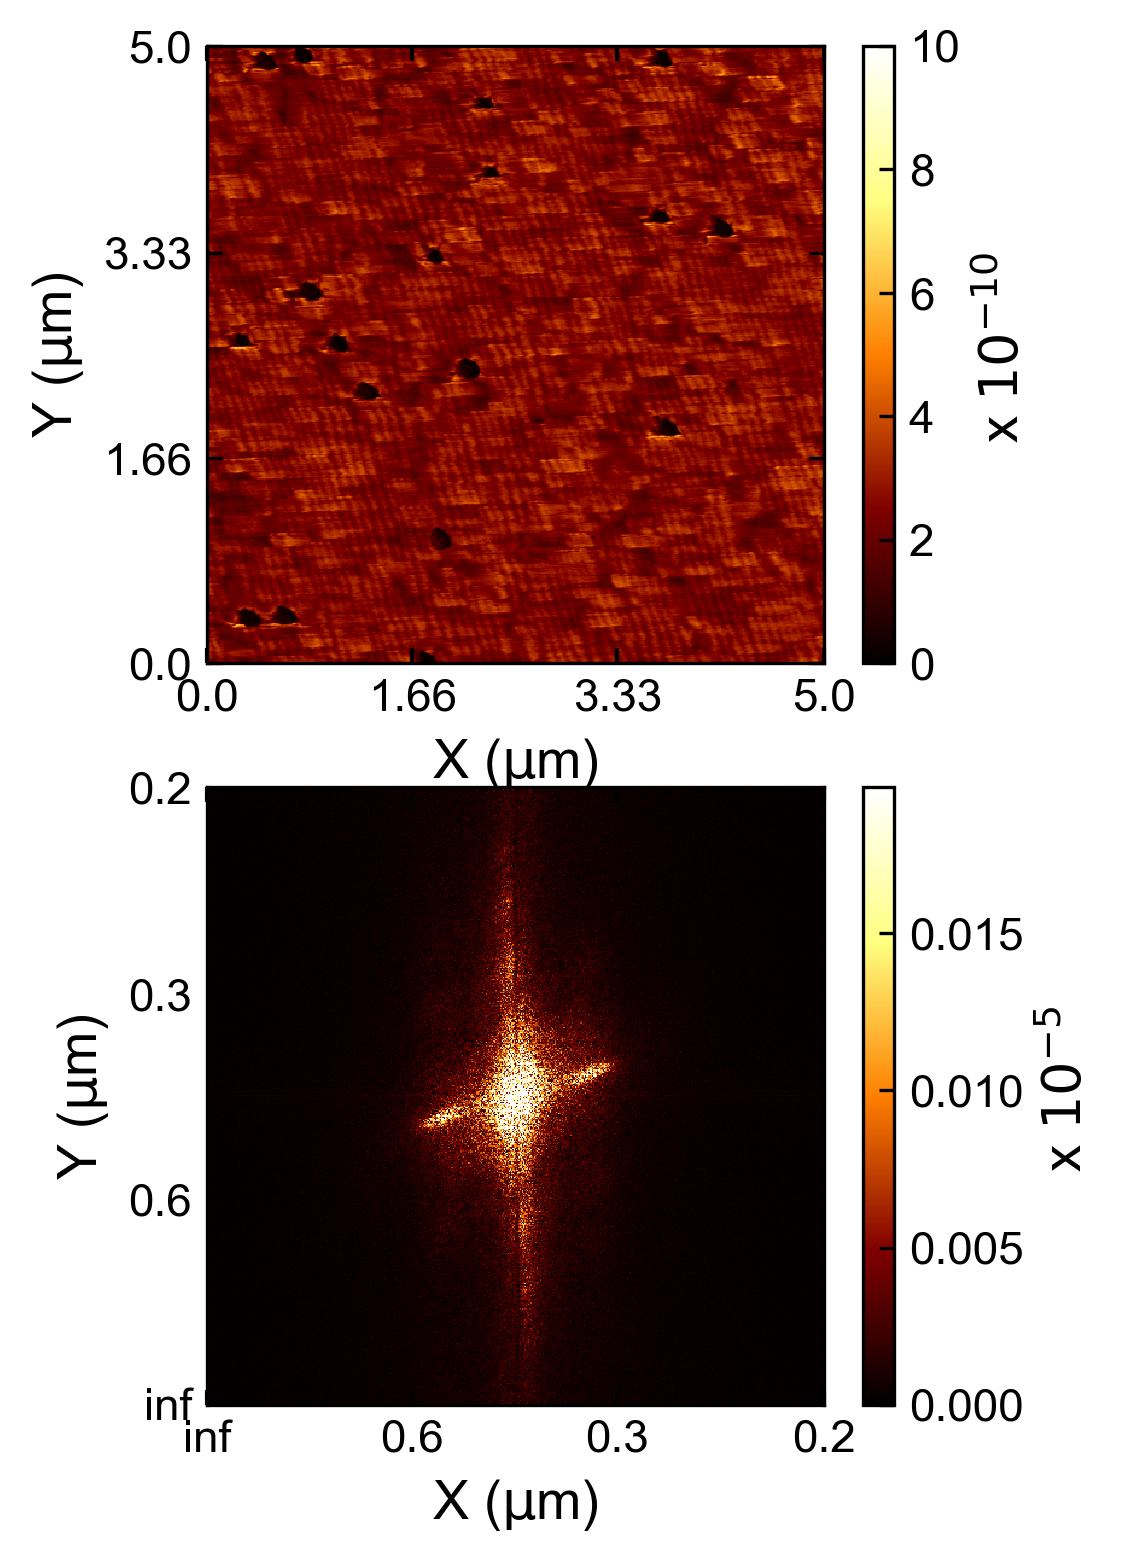

In [25]:
plt.style.use('PFM')
i=1
fig, ax = plt.subplots(2,1, figsize=(4.2,6))

fig, ax[0], cb1 = single_image_plot(catalogue[j][i].get_n_dim_form().squeeze(), 'title', xvec, axis=ax[0], zrange=(0,10))
fft_scan = get_2DFFT(catalogue[j][i])
xfreq = [1/x for x in xvec]
maxns = [max(line) for line in np.abs(fft_scan)]
maxn = max(maxns)
fig, ax[1], cb2 = single_image_plot(np.abs(fft_scan), 'FFT', xfreq, axis=ax[1], zrange=(0,300*maxn))
#ax[1].set(xlabel='1/X (1/$\\mathrm{\\mu}$m)', ylabel='1/Y (1/$\\mathrm{\\mu}$m)')

#plt.savefig(datfiles[1].filename[:-4] + '_phase1.svg')

outdir = r'C:\Users\oliver\OneDrive - UNSW\Data\\'

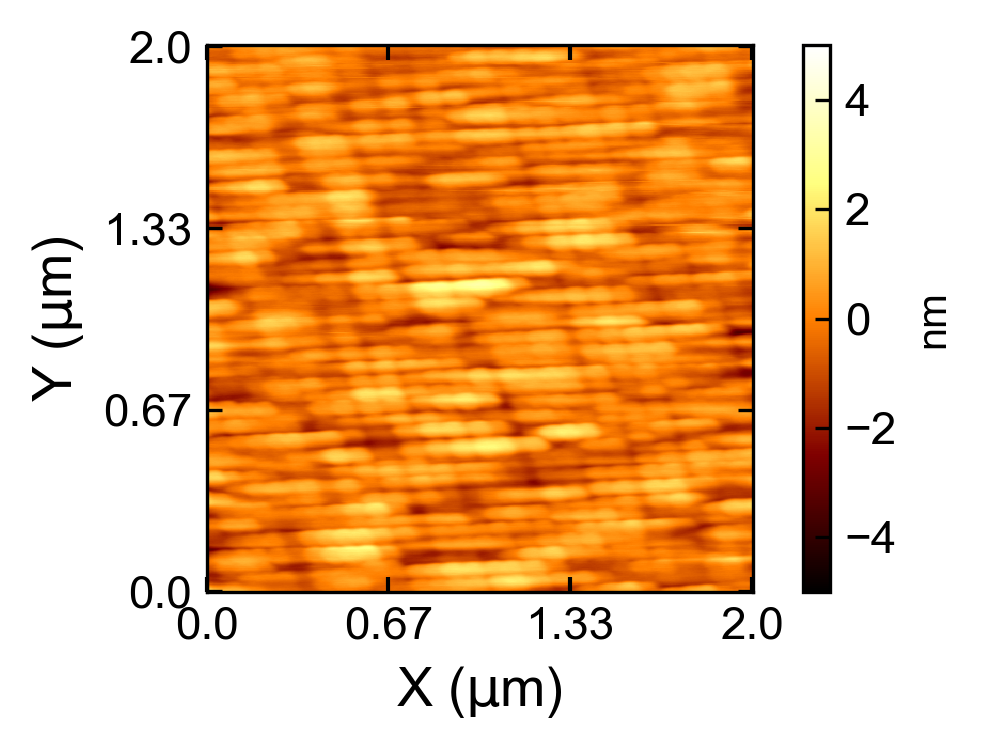

In [32]:
j=10
fig, ax = plt.subplots()

fft_scan = get_2DFFT(catalogue[j][0])
xvec = np.linspace( 0, usid.hdf_utils.get_attributes(datfiles[j]['Measurement_000'])['ScanSize']/10**(-6), 
                       len(catalogue[j][0].get_n_dim_form().squeeze()))
fig, ax, cbar = single_image_plot(catalogue[j][0].get_n_dim_form().squeeze()/10**(-9), 'Topo', xvec, axis=ax, zrange=(-5,5), cbar_label='nm')
plt.tight_layout()

plt.savefig(outdir + os.path.basename(catalogue[j][i].file.filename)[:-3] + '_topo.svg', transparent=True)

2.3499507473227235e-06


C:\Users\oliver\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


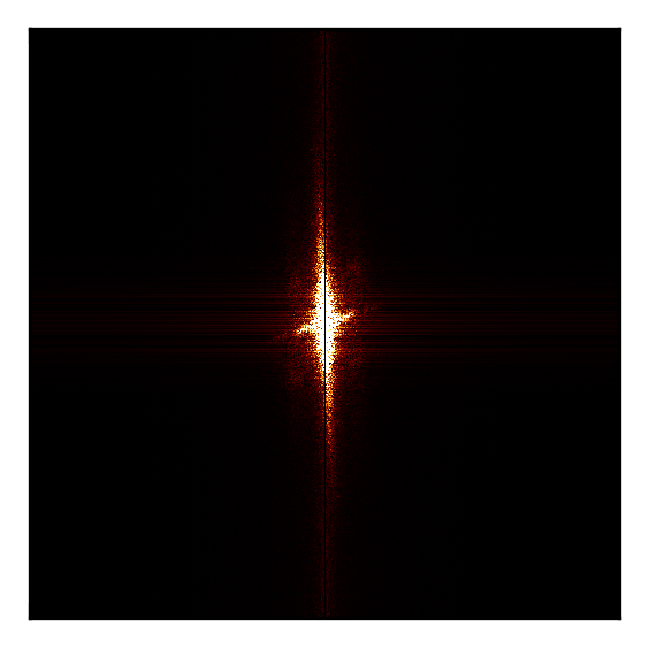

In [31]:
fig, ax = plt.subplots()

fft_scan = get_2DFFT(catalogue[j][0])
maxns = [max(line) for line in np.abs(fft_scan)]
maxn = np.average(maxns)
print(maxn)
xfreq = [1/x for x in xvec]
fig, ax, cbar = single_image_plot(np.abs(fft_scan), 'topo_FFT', xfreq, axis=ax, zrange=(0,100000*maxn))
ax.set(xlabel='', ylabel='')

cbar.remove()
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.savefig(outdir + os.path.basename(catalogue[j][0].file.filename)[:-3] + '_topo_FFT.svg', transparent=True)

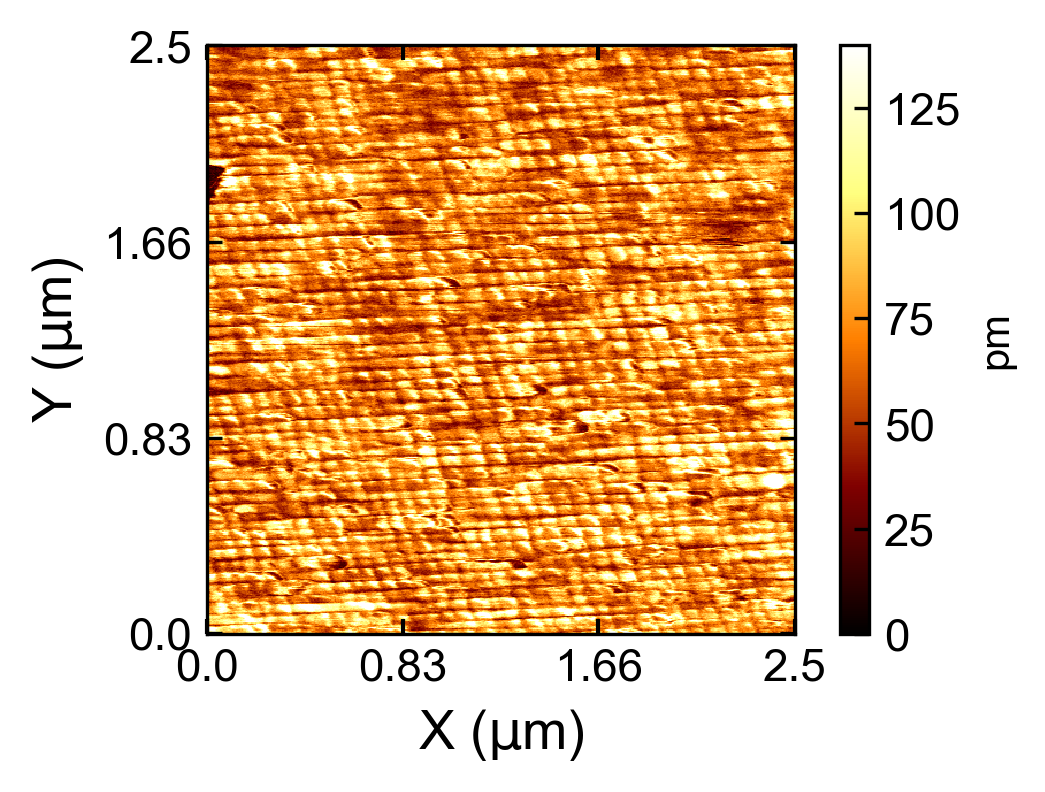

In [12]:
fig, ax = plt.subplots()

fft_scan = get_2DFFT(catalogue[j][1])

fig, ax, cbar = single_image_plot(catalogue[j][1].get_n_dim_form().squeeze()/10**(-12), 
                                  'ampl', xvec, axis=ax, zrange=(0,140), cbar_label='pm')


plt.savefig(outdir + os.path.basename(catalogue[j][1].file.filename)[:-3] + '_ampl.svg', transparent=True)

1.2742250093515977e-07


C:\Users\oliver\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


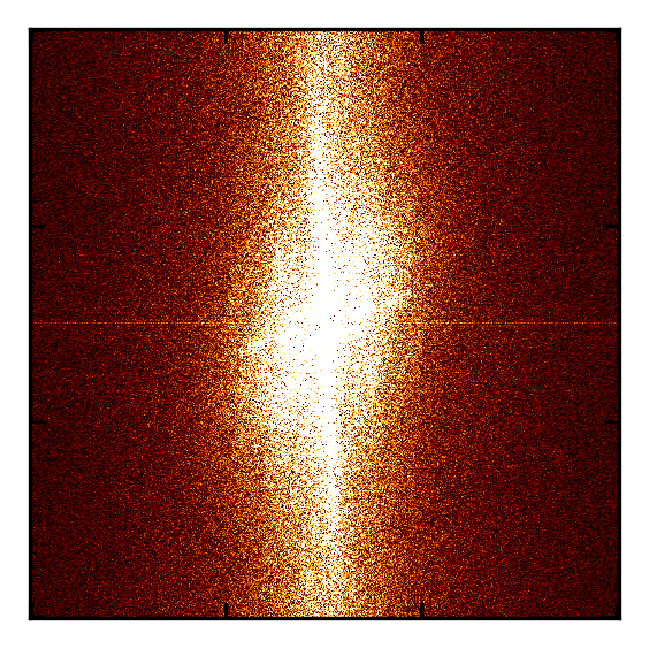

In [13]:
fig, ax = plt.subplots()

fft_scan = get_2DFFT(catalogue[j][1])
maxns = [max(line) for line in np.abs(fft_scan)]
maxn = np.average(maxns)
print(maxn)
xfreq = [1/x for x in xvec]
fig, ax, cbar = single_image_plot(np.abs(fft_scan), 'FFT', xfreq, axis=ax, zrange=(0,10000*maxn))
ax.set(xlabel='', ylabel='')

cbar.remove()
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.savefig(outdir + os.path.basename(catalogue[j][1].file.filename)[:-3] + '_ampl_FFT.svg', transparent=True)

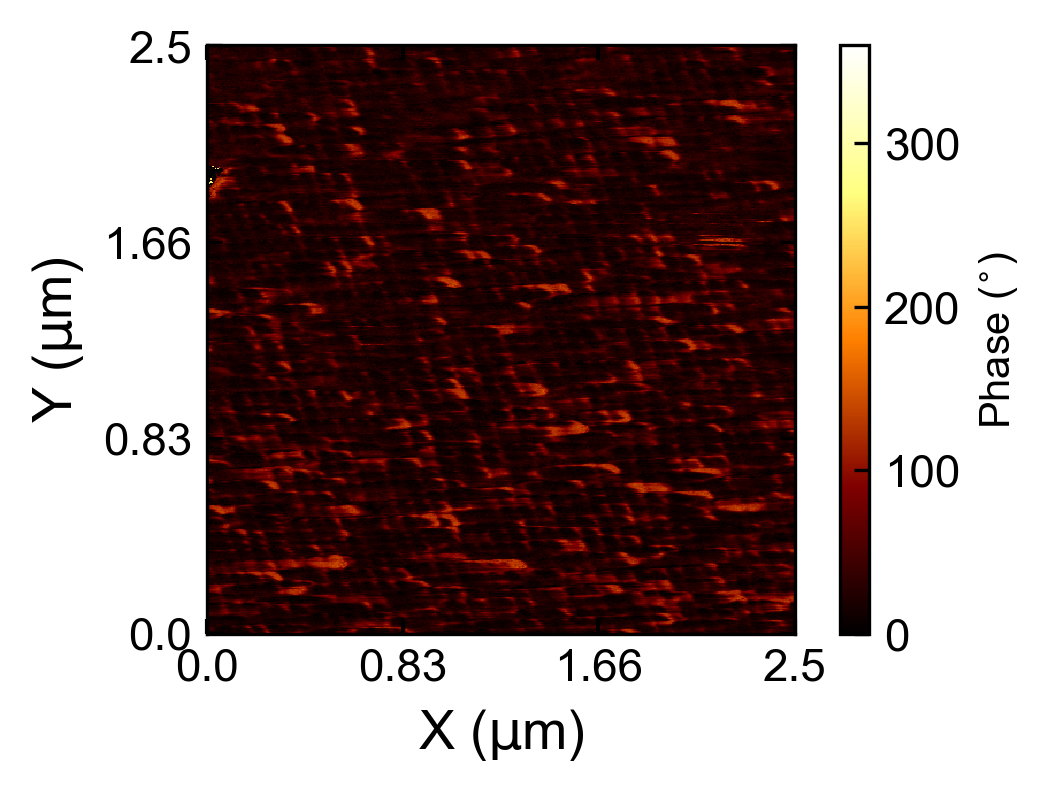

In [14]:
fig, ax = plt.subplots()

fft_scan = get_2DFFT(catalogue[j][3])

fig, ax, cbar = single_image_plot(catalogue[j][3].get_n_dim_form().squeeze(), 'Phase', xvec, axis=ax, zrange=(0,360), cbar_label='Phase ($^{\\circ}$)')


plt.savefig(outdir + os.path.basename(catalogue[j][2].file.filename)[:-3] + '_phase.svg', transparent=True)

77585.15197140104


C:\Users\oliver\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


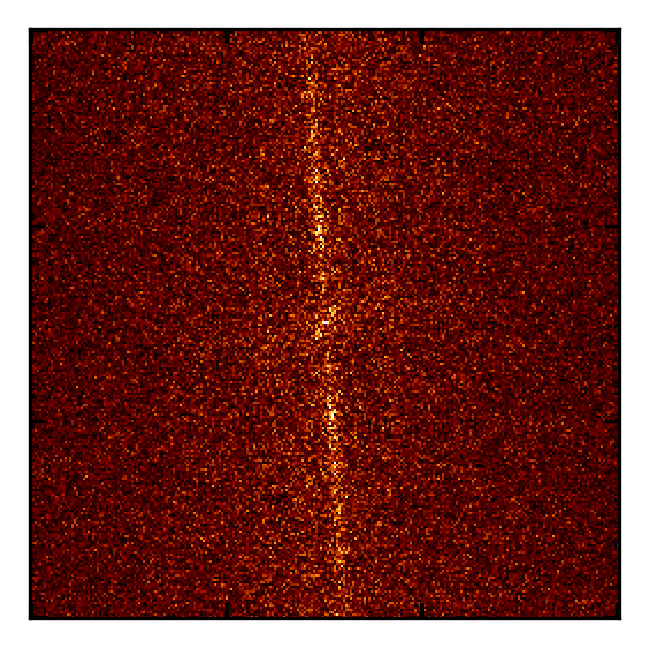

In [277]:
fig, ax = plt.subplots()

fft_scan = get_2DFFT(catalogue[j][3])
maxns = [max(line) for line in np.real(fft_scan)]
maxn = np.average(maxns)
print(maxn)
xfreq = [1/x for x in xvec]
fig, ax, cbar = single_image_plot(np.abs(fft_scan), 'phase_FFT', xfreq, axis=ax, zrange=(0,0.005))
ax.set(xlabel='', ylabel='')

cbar.remove()
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.savefig(outdir + os.path.basename(catalogue[j][1].file.filename)[:-3] + '_phase_FFT.svg', transparent=True)

In [14]:
dataset = usid.hdf_utils.get_all_main(h5_file)

C:\Users\oliver\anaconda3\lib\site-packages\pyUSID\io\usi_data.py:151: UserWarning: This dataset does not have an N-dimensional form
  warn('This dataset does not have an N-dimensional form')


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ff33d4fcc8>)

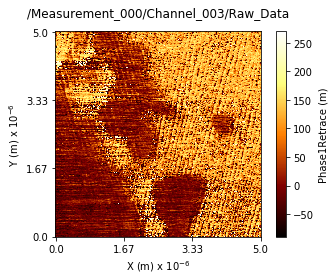

In [18]:
#fig, ax = plt.subplots(1,2)

dataset[3].visualize(cmap=plt.cm.afmhot)

In [97]:
def get_2DFFT( image, axis=None ):
    image_raw = image.get_n_dim_form().squeeze()

    fft_image = np.fft.fft2(image_raw)

    fft_image = np.fft.fftshift(fft_image)
    
    return fft_image
    
axis = usid.plot_utils.plot_map(axis, np.abs(fft_image), clim=[0, 0.05])
        